In [1]:
root = "/raid/datasets/cheXpert/us13.mailchimp.com/mctx/CheXpert-v1.0-small/"

In [2]:
import os

os.listdir(root)

['train.csv', 'valid.csv', 'valid', 'train']

In [5]:
import pandas as pd

dev_df = pd.read_csv(os.path.join(root, "train.csv"))
test_df = pd.read_csv(os.path.join(root, "valid.csv"))

In [6]:
dev_df["split"] = "train"
test_df["split"] = "test"
# add split to train_df
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(dev_df, test_size=0.1, random_state=42)
val_df["split"] = "val"
df = pd.concat([train_df, val_df, test_df])

In [9]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'split'],
      dtype='object')

In [12]:
df["img_path"] = df["Path"].apply(lambda x: os.path.join(root, "/".join(x.split("/")[1:])))

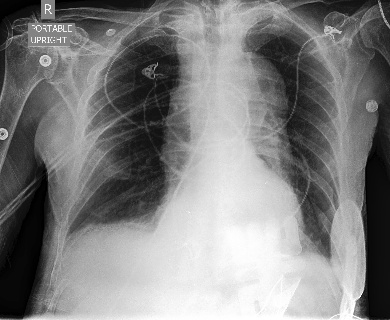

In [21]:
from PIL import Image

Image.open(df["img_path"].iloc[-1])

In [28]:
# add labels
df.columns
label_cols = [c for c in df.columns if c not in ["Path", "img_path", "split", "Sex", "Age", "Frontal/Lateral", "AP/PA"]]
print(label_cols)
labels = df[label_cols].to_numpy()


['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [33]:
df["labels"] = list(labels)
df = df.drop(columns=label_cols)

In [35]:
sex, age = df["Sex"], df["Age"]
df = df.drop(columns=["Sex", "Age", "AP/PA", "Frontal/Lateral", "Path"])

In [40]:
# save df
root = "chexpert/"
os.makedirs(root, exist_ok=True)
df.to_pickle(root + "final_df.pkl")
import numpy as np
np.save(root + "label_names.npy", list(label_cols))

# save age and sex
np.save(root + "sex.npy", sex.to_numpy())
np.save(root + "age.npy", age.to_numpy())